In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(
    "/content/game_details.csv",
    index_col='game_name',
    usecols=['game_name', 'highest_price', 'release_date', 'genre', 'publisher', 'platform',])

In [6]:
df.head()

,highest_price,release_date,genre,publisher,platform
game_name,,,,,
Grand Theft Auto IV,€24.99,"Feb 15, 2012",Action / Shooter / Racing,Rockstar,PS3
Red Dead Redemption 2,€59.99,"Oct 26, 2018",Action / Adventure / Unique,Rockstar Games,PS4
Red Dead Online,€69.99,"Oct 29, 2018",Action / Adventure,Rockstar Games,PS4
Grand Theft Auto 3,€9.99,"Oct 4, 2012",--,Rockstar Games,PS3
Grand Theft Auto V,€69.99,"Sep 17, 2013",Action / Adventure,Rockstar Games,PS3


In [7]:
# Removendo caracter de moeda
df['highest_price'] = df['highest_price'].str.replace('€', '')

In [8]:
df.head()

,highest_price,release_date,genre,publisher,platform
game_name,,,,,
Grand Theft Auto IV,24.99,"Feb 15, 2012",Action / Shooter / Racing,Rockstar,PS3
Red Dead Redemption 2,59.99,"Oct 26, 2018",Action / Adventure / Unique,Rockstar Games,PS4
Red Dead Online,69.99,"Oct 29, 2018",Action / Adventure,Rockstar Games,PS4
Grand Theft Auto 3,9.99,"Oct 4, 2012",--,Rockstar Games,PS3
Grand Theft Auto V,69.99,"Sep 17, 2013",Action / Adventure,Rockstar Games,PS3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3526 entries, Grand Theft Auto IV to Vostok Inc.
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   highest_price  3415 non-null   object
 1   release_date   3526 non-null   object
 2   genre          3526 non-null   object
 3   publisher      3471 non-null   object
 4   platform       3526 non-null   object
dtypes: object(5)
memory usage: 165.3+ KB


In [10]:
# Alterando a coluna release_date para o tipo datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
df['release_date']

,release_date
game_name,
Grand Theft Auto IV,2012-02-15
Red Dead Redemption 2,2018-10-26
Red Dead Online,2018-10-29
Grand Theft Auto 3,2012-10-04
Grand Theft Auto V,2013-09-17
...,...
SENRAN KAGURA Burst Re:Newal,2019-01-18
Smash Hit Plunder,2018-10-05
FOX n FORESTS,2018-05-17


In [12]:
# Removendo  o valor FREE da coluna highest_price
df['highest_price'] = df['highest_price'].str.replace('FREE', '0')

In [13]:
# Validando se ainda há valores 'FREE' na coluna highest_price
df.loc[df['highest_price'] == 'FREE', 'highest_price'].count()

np.int64(0)

In [14]:
df.head()

,highest_price,release_date,genre,publisher,platform
game_name,,,,,
Grand Theft Auto IV,24.99,2012-02-15,Action / Shooter / Racing,Rockstar,PS3
Red Dead Redemption 2,59.99,2018-10-26,Action / Adventure / Unique,Rockstar Games,PS4
Red Dead Online,69.99,2018-10-29,Action / Adventure,Rockstar Games,PS4
Grand Theft Auto 3,9.99,2012-10-04,--,Rockstar Games,PS3
Grand Theft Auto V,69.99,2013-09-17,Action / Adventure,Rockstar Games,PS3


In [15]:
#Veririficando se há separador vírgula na coluna de preço
df.loc[df['highest_price'].fillna('').str.contains(',')]

,highest_price,release_date,genre,publisher,platform
game_name,,,,,
Injustice™ 2 - Standard Edition,"10,000.00",2017-05-18,Fighting,WARNER BROS. INTERACTIVE,PS4
Trine 4: The Nightmare Prince,"10,000.00",2019-10-08,Puzzle / Action / Adventure,Frozenbyte LTD,PS4
WRC 8 FIA World Rally Championship,"10,000.00",2019-09-05,Arcade / Sports / Racing / Simulation,NACON SA,PS4
Amnesia: Collection,"10,000.00",2016-11-22,Action / Adventure / Horror,FRICTIONAL GAMES AB,PS4
Kingdom Come: Deliverance,"10,000.00",2018-02-13,Role playing games / Adventure,Deep Silver,PS4
Observation,"10,000.00",2019-05-21,Adventure / Horror,Devolver Digital,PS4
RAD,"10,000.00",2019-08-20,Action,BANDAI NAMCO ENTERTAINMENT EUROPE,PS4
RAGE 2,"10,000.00",2019-05-13,Action / Shooter / Simulation,Bethesda,PS4
My Time at Portia,"10,000.00",2019-04-16,Role playing games / Adventure / Simulation,Focus Entertainment,PS4


In [16]:
# Substituindo a vírgula por ponto
df['highest_price'] = df['highest_price'].str.replace(',', '.', regex=False)

In [17]:
# detectando valores maiores que 6 caracteres na coluna highest_price e alterando para pegar 5 caracteres
mask = df['highest_price'].str.len() > 6
df.loc[mask, 'highest_price'] = df.loc[mask, 'highest_price'].str[:5]


In [18]:
# Definindo os valores como tipo float
df['highest_price'] = df['highest_price'].astype(float)

In [19]:
# Alterando os valores anormais ('--') para NaN
df.loc[df['genre'] == '--', ['genre']] = df.loc[df['genre'] == '--', ['genre']].replace('--', np.nan)

/tmp/ipython-input-2083719873.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[df['genre'] == '--', ['genre']] = df.loc[df['genre'] == '--', ['genre']].replace('--', np.nan)


In [20]:
df.isna().sum()

,0
highest_price,111
release_date,0
genre,519
publisher,55
platform,0


In [21]:
#Removendo os valores NaN
df = df.dropna()

In [22]:
df.isna().sum()

,0
highest_price,0
release_date,0
genre,0
publisher,0
platform,0


In [23]:
df.duplicated().sum()

np.int64(27)

In [24]:
#Remove as duplicidades
df = df.drop_duplicates()

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df

,highest_price,release_date,genre,publisher,platform
game_name,,,,,
Grand Theft Auto IV,24.99,2012-02-15,Action / Shooter / Racing,Rockstar,PS3
Red Dead Redemption 2,59.99,2018-10-26,Action / Adventure / Unique,Rockstar Games,PS4
Red Dead Online,69.99,2018-10-29,Action / Adventure,Rockstar Games,PS4
Grand Theft Auto V,69.99,2013-09-17,Action / Adventure,Rockstar Games,PS3
Grand Theft Auto V,69.99,2014-11-18,Action / Adventure,Rockstar Games,PS4
...,...,...,...,...,...
SENRAN KAGURA Burst Re:Newal,39.99,2019-01-18,Action,Marvelous Europe Limited,PS4
Smash Hit Plunder,29.99,2018-10-05,Arcade / Unique / Family,TRIANGULAR PIXELS LTD,PS4
FOX n FORESTS,19.99,2018-05-17,Action / Role playing games / Adventure,ASTRAGON ENTERTAINMENT GMBH,PS4


In [27]:
# Filtrando somente as datas de 2024
df = (df[df['release_date'].dt.year == 2024])

In [28]:
df

,highest_price,release_date,genre,publisher,platform
game_name,,,,,
TSUKIHIME -A piece of blue glass moon-,54.99,2024-06-27,Adventure,ANIPLEX INC.,PS4
DAVE THE DIVER,19.99,2024-04-16,Adventure,Mintrocket,PS5 / PS4
Balatro,14.99,2024-02-20,Strategy,PLAYSTACK LIMITED,PS5 / PS4
The Last of Us™ Part II Remastered,49.99,2024-01-19,Action / Adventure,Sony Interactive Entertainment Europe,PS5
TEKKEN 8,79.99,2024-01-26,Fighting / Action,BANDAI NAMCO ENTERTAINMENT EUROPE,PS5
...,...,...,...,...,...
GRAVEN PS4 & PS5,29.99,2024-06-25,Action / Role playing games,Fulqrum Publishing Ltd.,PS5 / PS4
FRONT MISSION 2: Remake,34.99,2024-04-30,Role playing games,FOREVER ENTERTAINMENT S. A.,PS5 / PS4
Lunar Lander Beyond,29.99,2024-04-23,Action / Adventure,Atari Inc.,PS4


In [29]:
#Fixando somente um tipo de genero de jogo
mask = df['genre'].str.contains('/')
df.loc[mask, 'genre'] = df.loc[mask, 'genre'].str.split('/').str[0]
df['genre'] = df['genre'].str.strip()



/tmp/ipython-input-1665004037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['genre'].str.strip()


In [30]:
df

,highest_price,release_date,genre,publisher,platform
game_name,,,,,
TSUKIHIME -A piece of blue glass moon-,54.99,2024-06-27,Adventure,ANIPLEX INC.,PS4
DAVE THE DIVER,19.99,2024-04-16,Adventure,Mintrocket,PS5 / PS4
Balatro,14.99,2024-02-20,Strategy,PLAYSTACK LIMITED,PS5 / PS4
The Last of Us™ Part II Remastered,49.99,2024-01-19,Action,Sony Interactive Entertainment Europe,PS5
TEKKEN 8,79.99,2024-01-26,Fighting,BANDAI NAMCO ENTERTAINMENT EUROPE,PS5
...,...,...,...,...,...
GRAVEN PS4 & PS5,29.99,2024-06-25,Action,Fulqrum Publishing Ltd.,PS5 / PS4
FRONT MISSION 2: Remake,34.99,2024-04-30,Role playing games,FOREVER ENTERTAINMENT S. A.,PS5 / PS4
Lunar Lander Beyond,29.99,2024-04-23,Action,Atari Inc.,PS4


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, TSUKIHIME -A piece of blue glass moon- to Jet Kave Adventure
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   highest_price  139 non-null    float64       
 1   release_date   139 non-null    datetime64[ns]
 2   genre          139 non-null    object        
 3   publisher      139 non-null    object        
 4   platform       139 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 10.6+ KB


In [32]:
df.groupby('publisher')['highest_price'].mean().sort_values(ascending=False).head(5)

,highest_price
publisher,
LUCIANO IURINO T/A TROGLOBYTES GAMES,79.99
PQube Ltd,79.99
SEGA EUROPE LTD,69.99
Square Enix LTD,59.99
ANIPLEX INC.,54.99


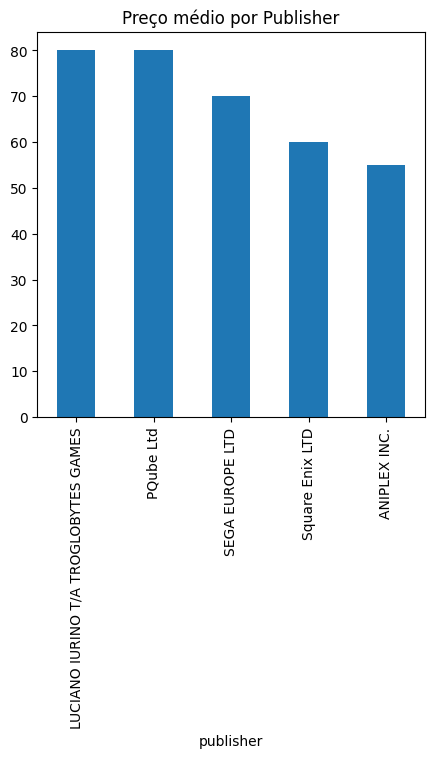

In [33]:
df.groupby('publisher')['highest_price'].mean().sort_values(ascending=False).head(5).plot(kind='bar', figsize=(5, 5))
plt.title('Preço médio por Publisher')
plt.show()

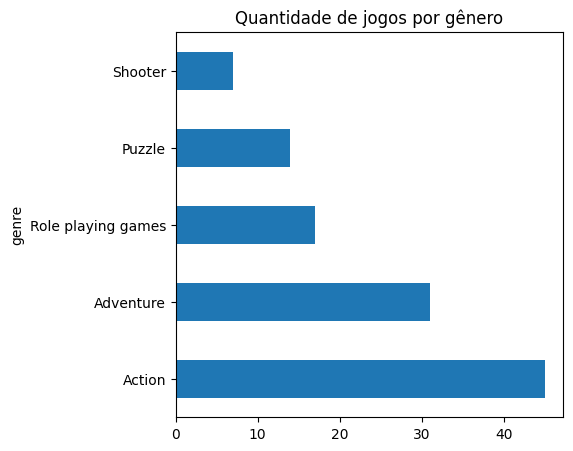

In [35]:
df['genre'].value_counts().sort_values(ascending=False).head(5).plot(kind='barh', figsize=(5, 5))
plt.title('Quantidade de jogos por gênero')
plt.show()

In [ ]:
df.groupby('genre')['highest_price'].mean().sort_values(ascending=False).head(5).plot(kind='bar', figsize=(5, 5))
plt.title('Preço médio por gênero')
plt.show()

In [ ]:

# Conta os valores
quantidades = df['platform'].value_counts()

# Função para exibir quantidade + percentual
def func_quantidade_percentual(pct, allvals):
    absolute = int(round(pct/100. * sum(allvals)))
    return f"{absolute} ({pct:.0f}%)"

# Plotando
quantidades.plot(
    kind='pie',
    autopct=lambda pct: func_quantidade_percentual(pct, quantidades),
    figsize=(6, 6)
)
plt.title('Quantidade de jogos por plataforma')
plt.show()


In [ ]:
df.to_excel('games_release.xlsx')